# Часть I: 


In [2]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from src.data_generation import generate_sample
from src.graph_utils import build_distance_graph, max_independent_set_size, build_knn_graph, max_degree

# Исследование зависимости числовой характеристики T от параметров распределений θ и υ


In [17]:
t3_alphas = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 3, 5] 
normal_alphas = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20]

n_samples = 50
n_iter = 1000
k = 5

# Результаты
t3_deg_means = []
normal_deg_means = []

# --- t3 ---
for alpha in t3_alphas:
    degs = []
    for _ in range(n_iter):
        data = generate_sample("t3", alpha=alpha, size=n_samples)
        G = build_knn_graph(data, k=k)
        deg = max_degree(G)
        degs.append(deg)
    t3_deg_means.append(np.mean(degs))

# --- normal ---
for alpha in normal_alphas:
    degs = []
    for _ in range(n_iter):
        data = generate_sample("normal", alpha=alpha, size=n_samples)
        G = build_knn_graph(data, k=k)
        deg = max_degree(G)
        degs.append(deg)
    normal_deg_means.append(np.mean(degs))

In [11]:
# После вычислений t3_deg_means и normal_deg_means

print("t3_alphas:", t3_alphas)
print("Средние max_degree для t3:", t3_deg_means)

print("\nnormal_alphas:", normal_alphas)
print("Средние max_degree для normal:", normal_deg_means)


t3_alphas: [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 3, 5]
Средние max_degree для t3: [np.float64(39.9), np.float64(21.943), np.float64(10.127), np.float64(9.819), np.float64(9.655), np.float64(9.518), np.float64(9.282), np.float64(9.214), np.float64(9.12)]

normal_alphas: [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20]
Средние max_degree для normal: [np.float64(8.974), np.float64(9.018), np.float64(9.024), np.float64(8.993), np.float64(9.02), np.float64(8.995), np.float64(9.012), np.float64(9.032), np.float64(9.019), np.float64(8.985)]


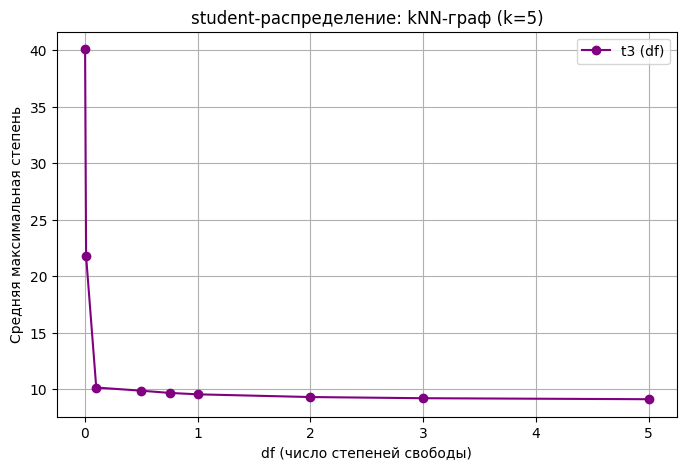

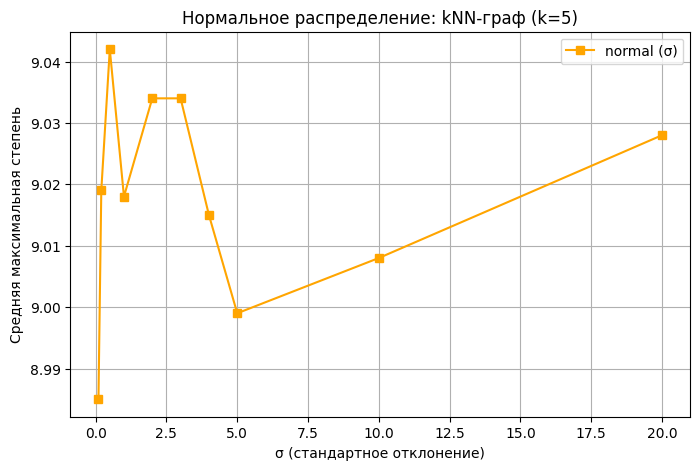

In [20]:
# --- График 1: t3 ---
plt.figure(figsize=(8, 5))
plt.plot(t3_alphas, t3_deg_means, marker='o', color='purple', label='t3 (df)')
plt.xlabel("df (число степеней свободы)")
plt.ylabel("Средняя максимальная степень")
plt.title("student-распределение: kNN-граф (k=5)")
plt.grid(True)
plt.legend()
plt.show()

# --- График 2: normal ---
plt.figure(figsize=(8, 5))
plt.plot(normal_alphas, normal_deg_means, marker='s', color='orange', label='normal (σ)')
plt.xlabel("σ (стандартное отклонение)")
plt.ylabel("Средняя максимальная степень")
plt.title("Нормальное распределение: kNN-граф (k=5)")
plt.grid(True)
plt.legend()
plt.show()

In [22]:
t3_alphas = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 3, 5, 10 , 30]   
normal_alphas = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20, 100, 1000]  

n_samples = 50
n_iter = 1000
distance_threshold = 1  

# Результаты
t3_mis_means = []
normal_mis_means = []

# --- t3 ---
for alpha in tqdm(t3_alphas, desc="t3 alphas"):
    mis_list = []
    for _ in range(n_iter):
        data = generate_sample("t3", alpha=alpha, size=n_samples)
        G = build_distance_graph(data, d=distance_threshold)
        mis_size = max_independent_set_size(G)
        mis_list.append(mis_size)
    t3_mis_means.append(np.mean(mis_list))

# --- normal ---
for alpha in tqdm(normal_alphas, desc="normal alphas"):
    mis_list = []
    for _ in range(n_iter):
        data = generate_sample("normal", alpha=alpha, size=n_samples)
        G = build_distance_graph(data, d=distance_threshold)
        mis_size = max_independent_set_size(G)
        mis_list.append(mis_size)
    normal_mis_means.append(np.mean(mis_list))

normal alphas: 100%|████████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.19it/s]


In [14]:
print("t3_alphas:", t3_alphas)
print("Средние размеры макс. независимого множества (t3):", [round(val, 3) for val in t3_mis_means])

print("\nnormal_alphas:", normal_alphas)
print("Средние размеры макс. независимого множества (normal):", [round(val, 3) for val in normal_mis_means])


t3_alphas: [0.001, 0.01, 0.1, 0.5, 0.75, 1, 2, 3, 5, 10, 30]
Средние размеры макс. независимого множества (t3): [np.float64(49.986), np.float64(49.2), np.float64(39.468), np.float64(19.375), np.float64(14.741), np.float64(12.217), np.float64(8.214), np.float64(6.953), np.float64(5.966), np.float64(5.321), np.float64(4.896)]

normal_alphas: [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 10, 20, 100, 1000]
Средние размеры макс. независимого множества (normal): [np.float64(1.0), np.float64(1.207), np.float64(2.751), np.float64(4.689), np.float64(7.995), np.float64(10.706), np.float64(12.98), np.float64(14.946), np.float64(22.411), np.float64(30.256), np.float64(44.001), np.float64(49.319)]


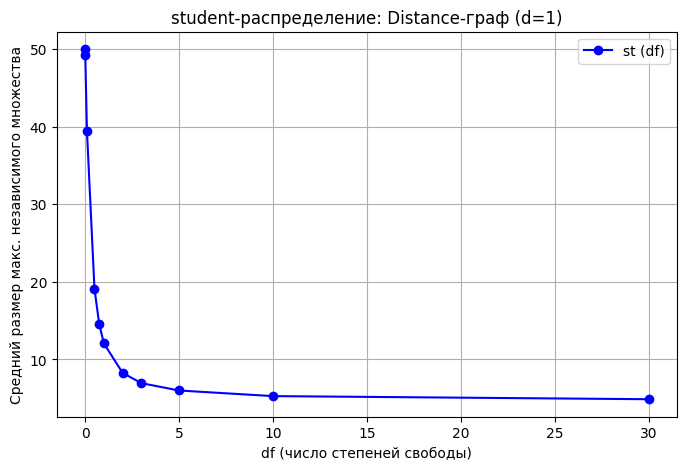

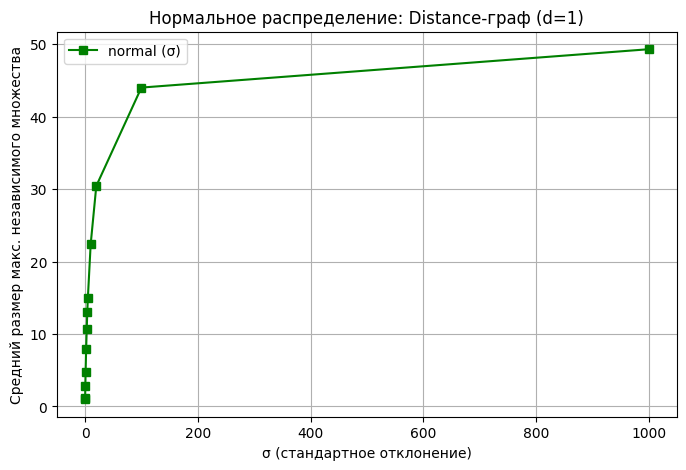

In [24]:
# --- График 1: t3 ---
plt.figure(figsize=(8, 5))
plt.plot(t3_alphas, t3_mis_means, marker='o', color='blue', label='st (df)')
plt.xlabel("df (число степеней свободы)")
plt.ylabel("Средний размер макс. независимого множества")
plt.title(f"student-распределение: Distance-граф (d={distance_threshold})")
plt.grid(True)
plt.legend()
plt.show()

# --- График 2: normal ---
plt.figure(figsize=(8, 5))
plt.plot(normal_alphas, normal_mis_means, marker='s', color='green', label='normal (σ)')
plt.xlabel("σ (стандартное отклонение)")
plt.ylabel("Средний размер макс. независимого множества")
plt.title(f"Нормальное распределение: Distance-граф (d={distance_threshold})")
plt.grid(True)
plt.legend()
plt.show()

# Исследование зависимости числовой характеристики T от параметров процедуры построения графа и размера выборки



In [3]:
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 150, 250, 500]
k_neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9]
n_iter = 1000

def plot_grid_max_degree(dist_name, alpha):
    fig, axes = plt.subplots(
        nrows=len(n_samples),
        ncols=len(k_neighbours),
        figsize=(4 * len(k_neighbours), 3 * len(n_samples)),
        sharex=True, sharey=True
    )
    fig.suptitle(f"Max Degree in kNN Graphs — Distribution: {dist_name}, alpha={alpha}", fontsize=16)

    for i, n in enumerate(tqdm(n_samples, desc=f"{dist_name} sample sizes")):
        for j, k in enumerate(k_neighbours):
            degs = []
            for _ in range(n_iter):
                data = generate_sample(dist_name, alpha=alpha, size=n)
                G = build_knn_graph(data, k=k)
                degs.append(max_degree(G))
            
            ax = axes[i, j]
            # Покажем распределение значений max_degree как точечный график
            ax.plot(degs, color="green", alpha=0.3, marker='.', linestyle='None', markersize=1)
            avg_deg = np.mean(degs)
            ax.set_title(f"n={n}, k={k}\navg={avg_deg:.2f}")
            ax.set_xlim(0, n_iter)
            ax.set_ylim(0, max(k_neighbours)+5)

            if j == 0:
                ax.set_ylabel(f"n={n}")
            if i == len(n_samples) - 1:
                ax.set_xlabel(f"k={k}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



t3 sample sizes: 100%|██████████████████████████████████████████████████████| 13/13 [03:33<00:00, 16.39s/it]


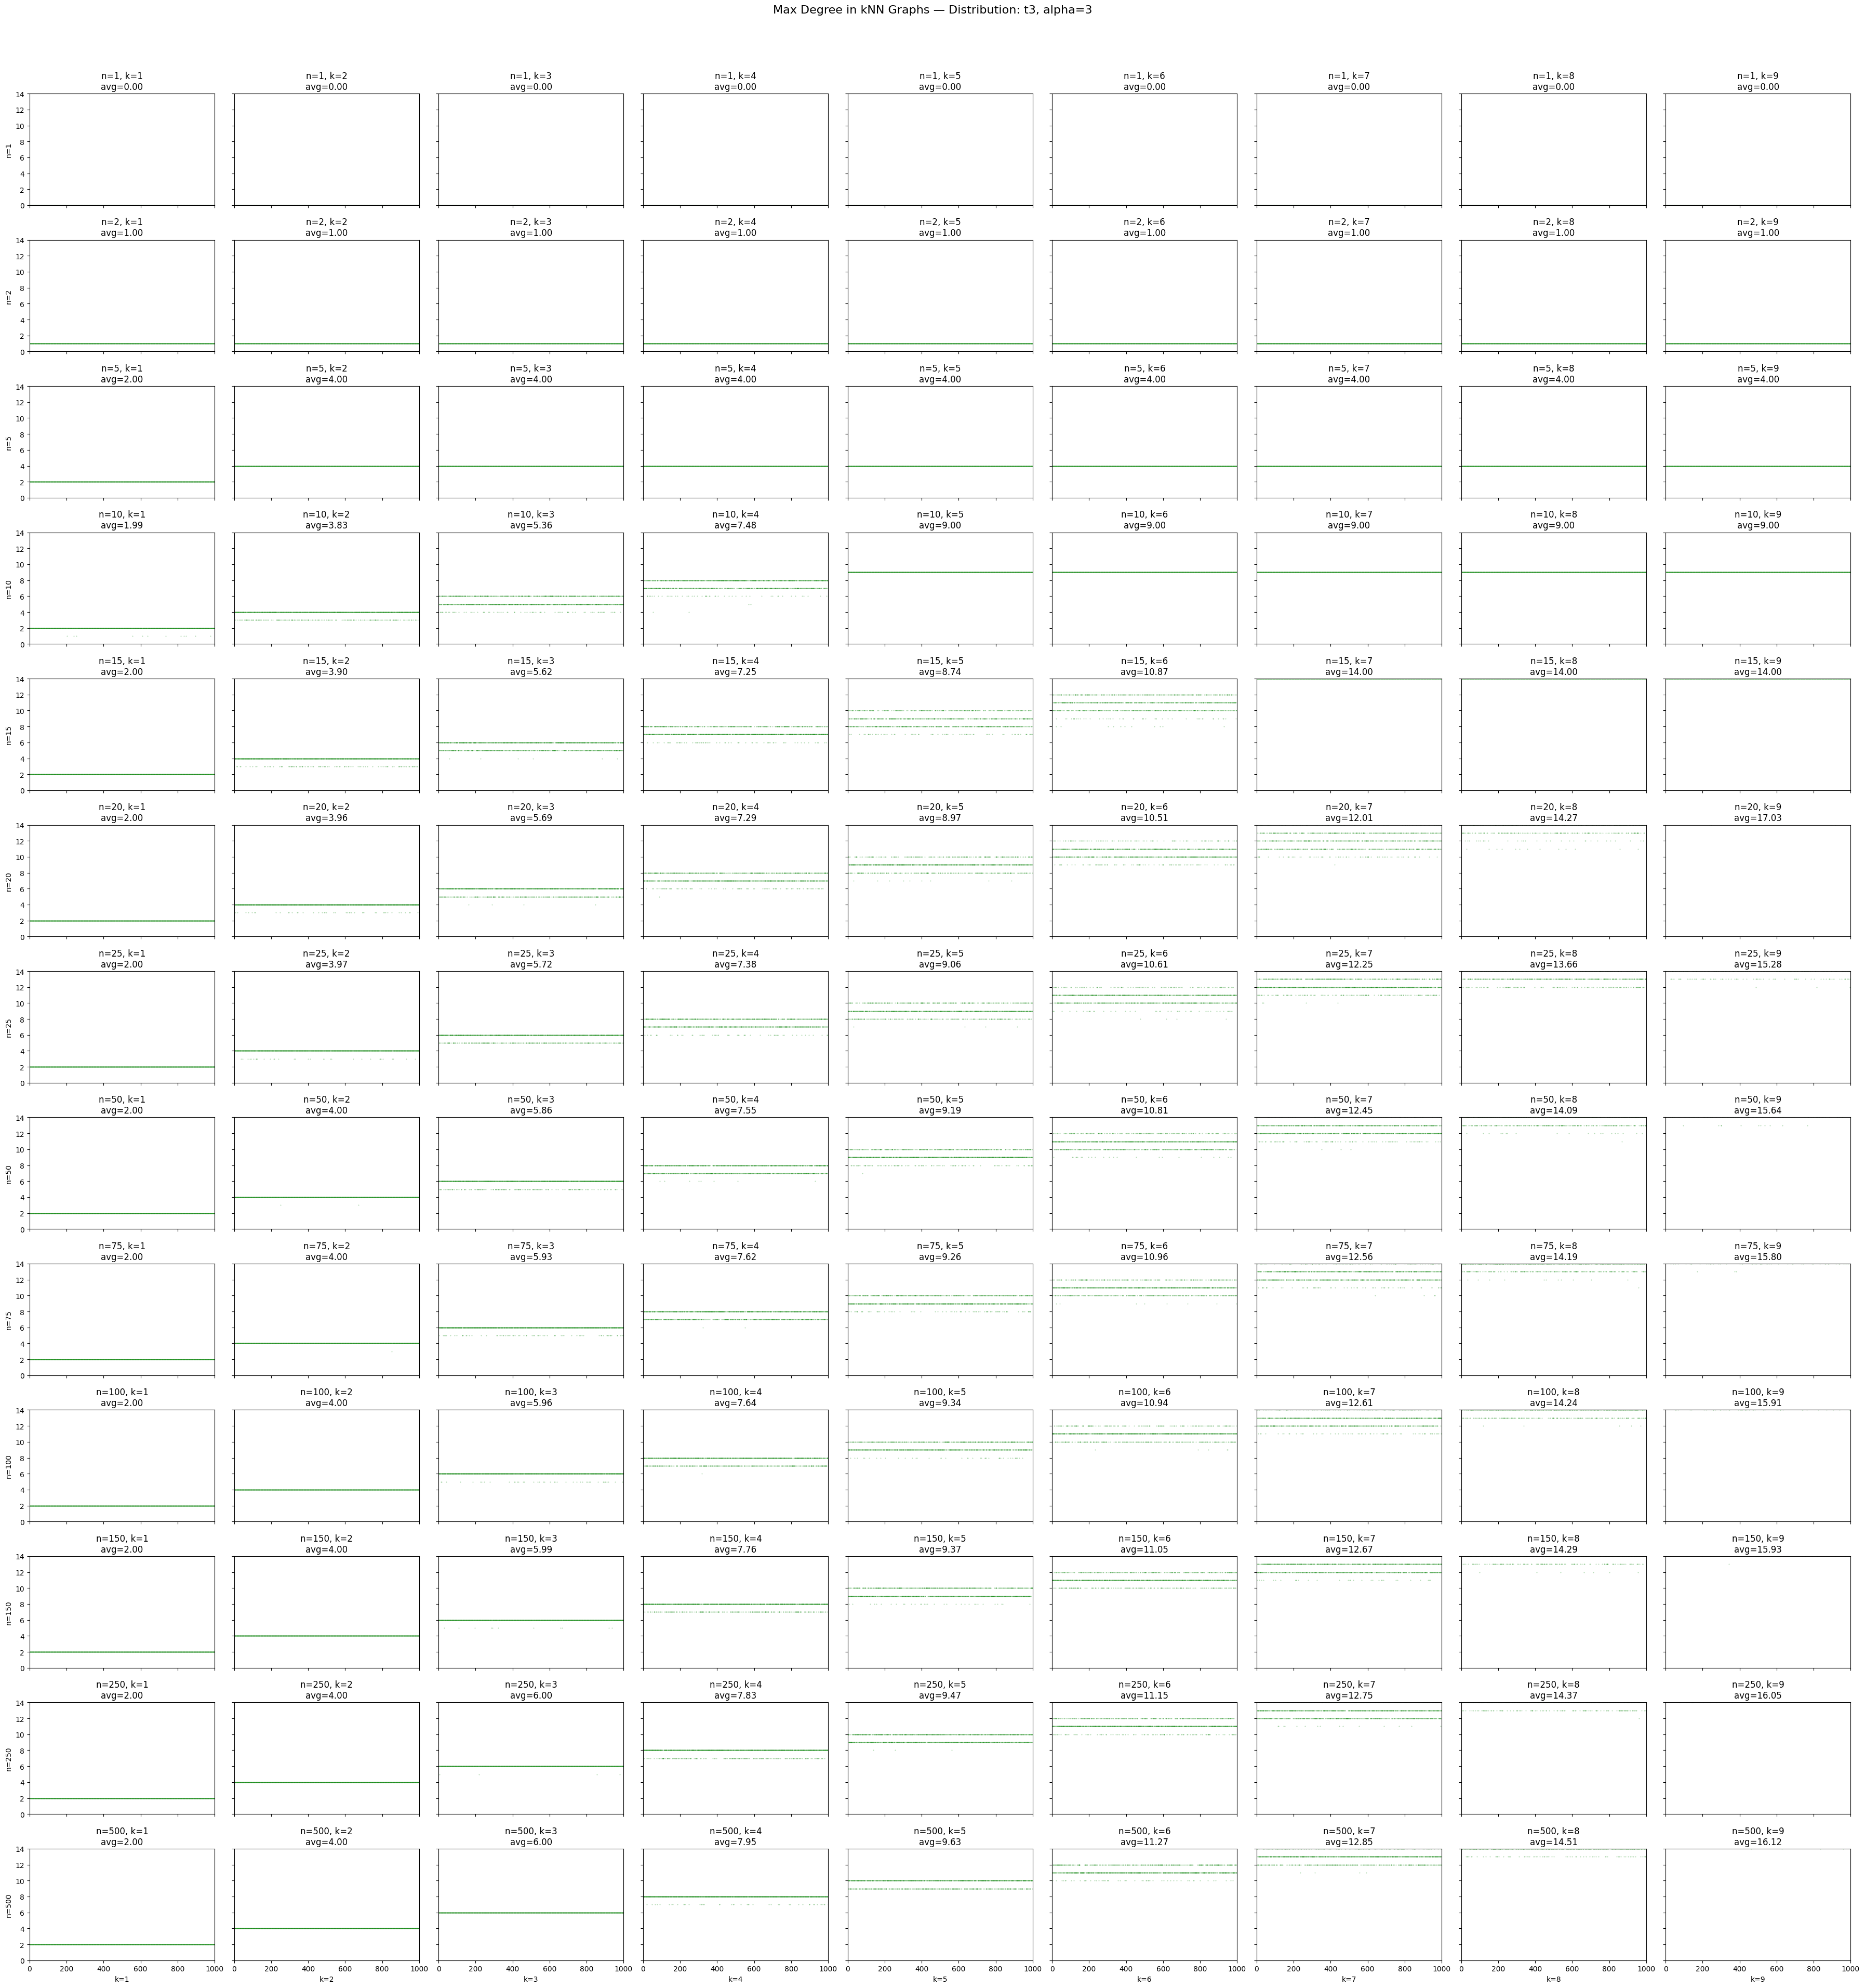

normal sample sizes: 100%|██████████████████████████████████████████████████| 13/13 [03:26<00:00, 15.92s/it]


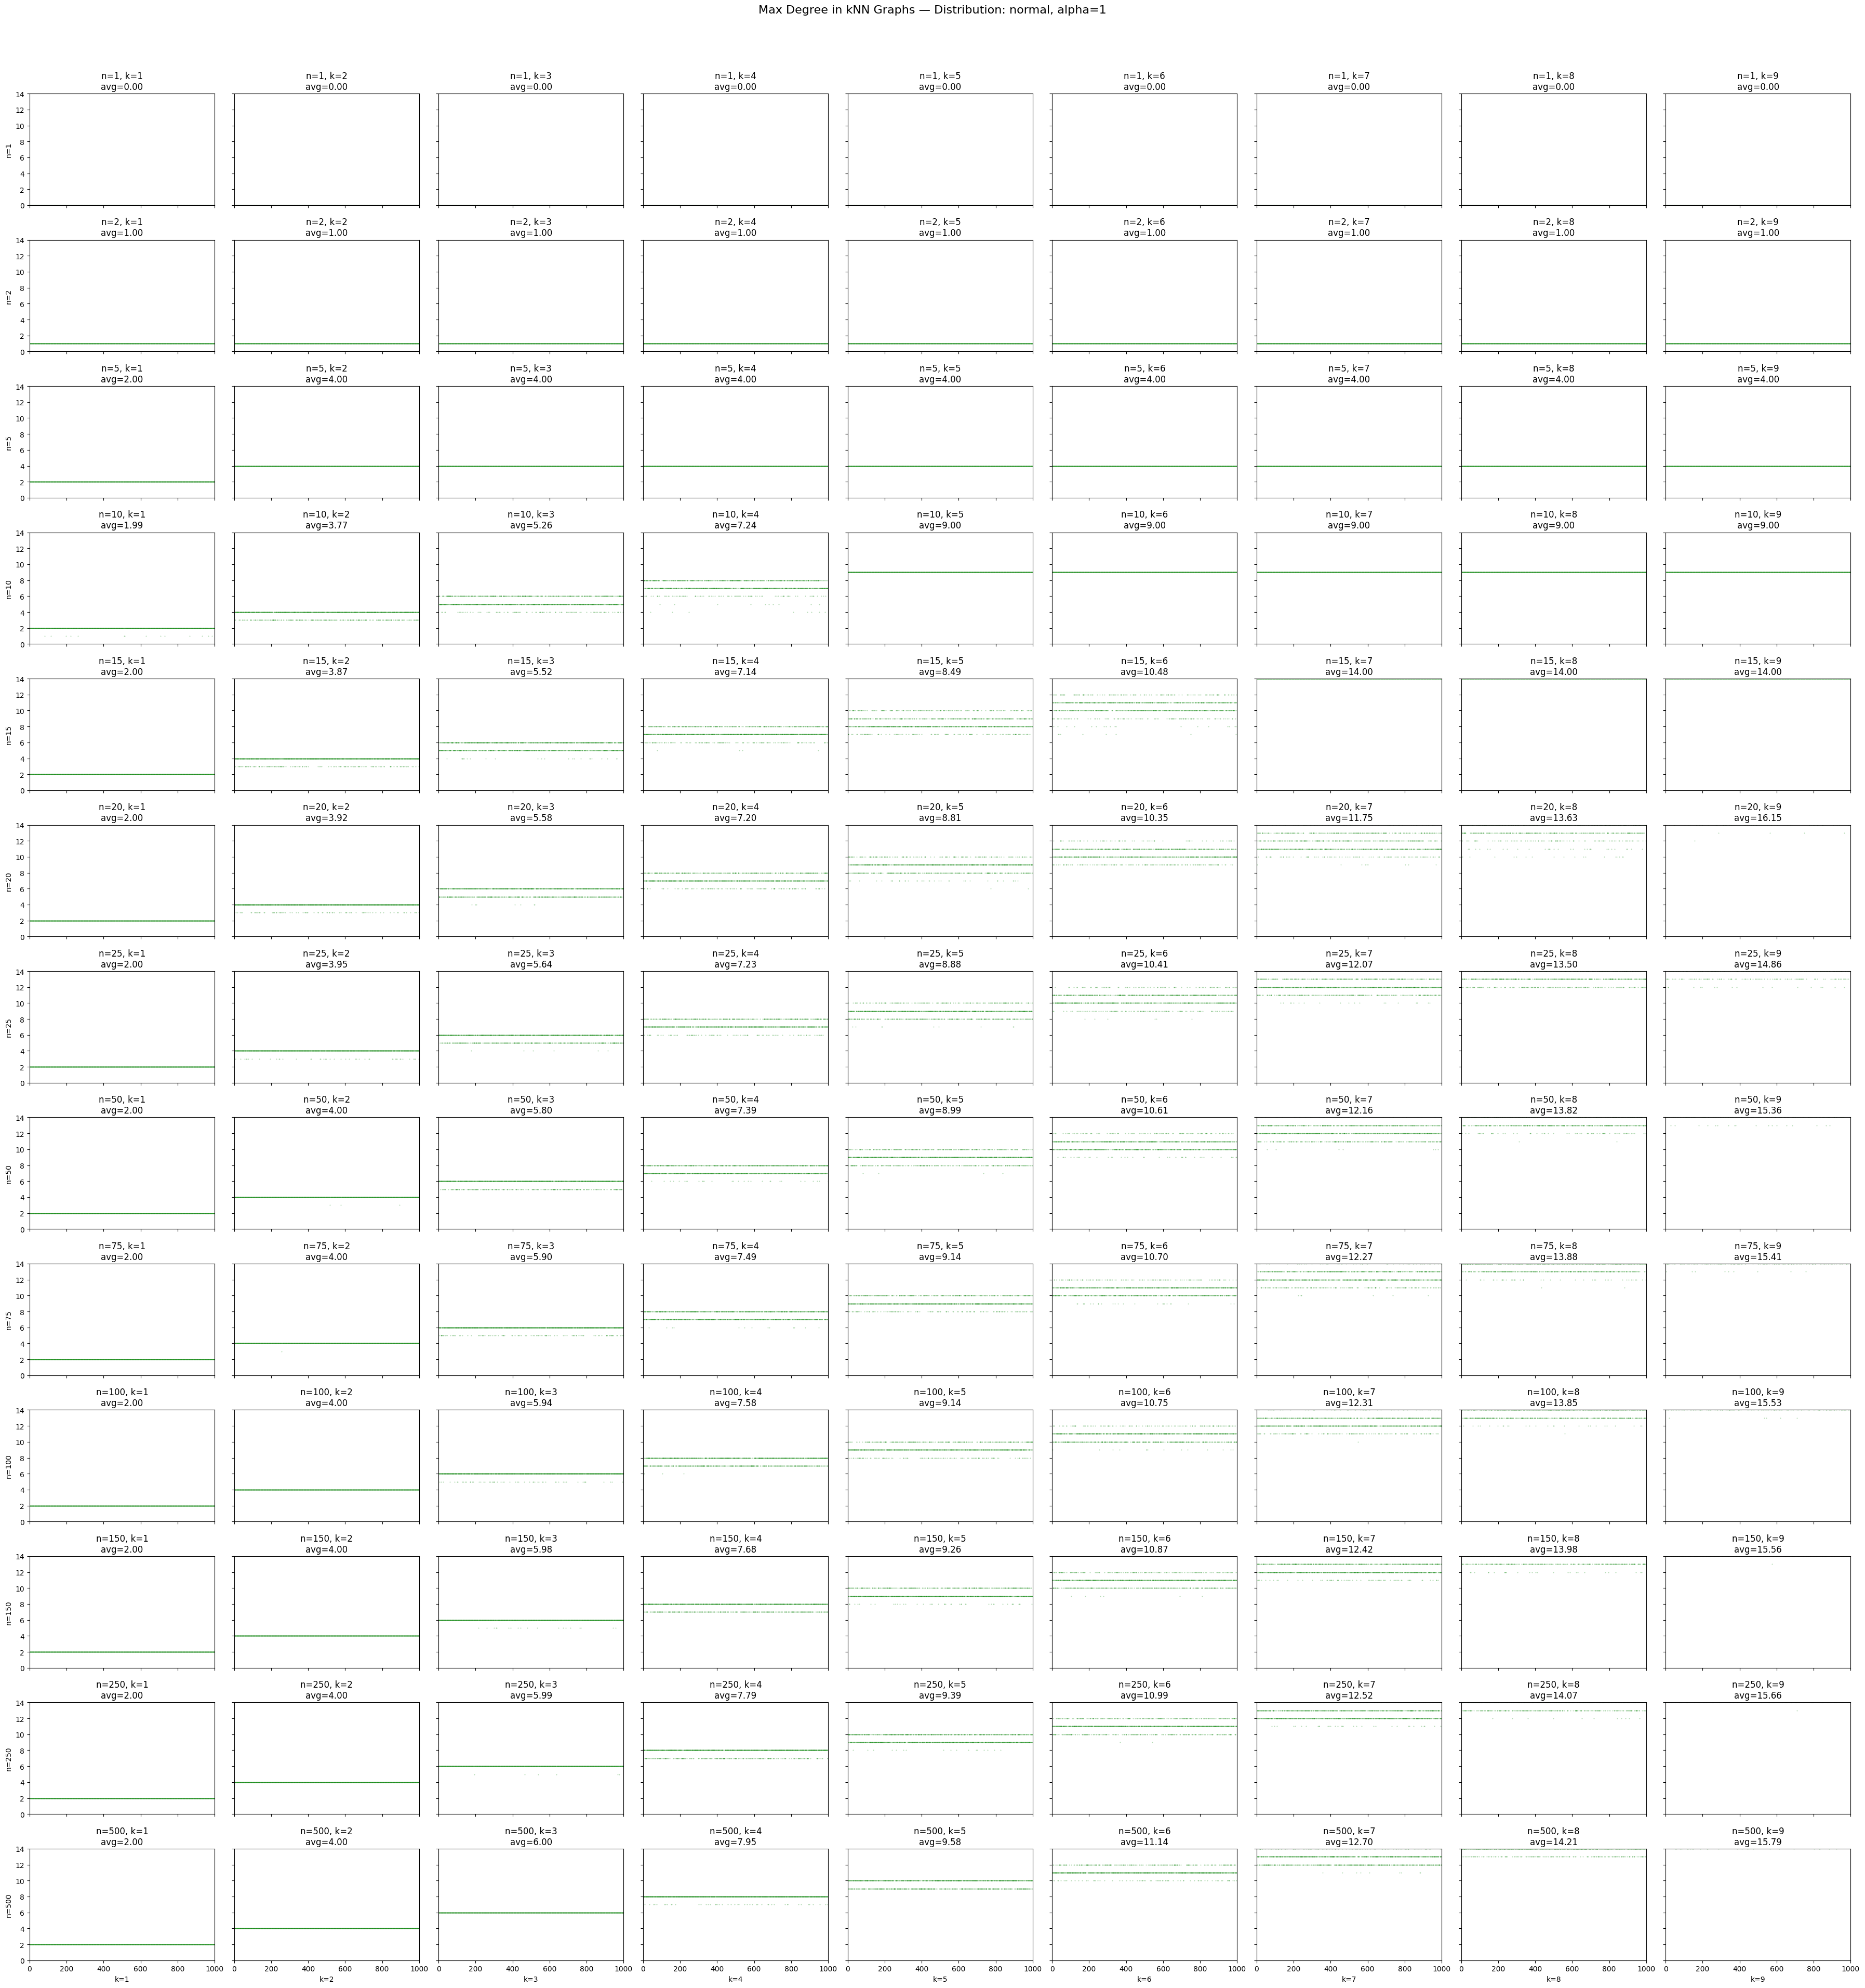

In [4]:
# Фиксированные параметры alpha
t3_alpha = 3
normal_alpha = 1

plot_grid_max_degree("t3", t3_alpha)
plot_grid_max_degree("normal", normal_alpha)

K neighbours: 100%|█████████████████████████████████████████████████████████| 11/11 [02:38<00:00, 14.44s/it]


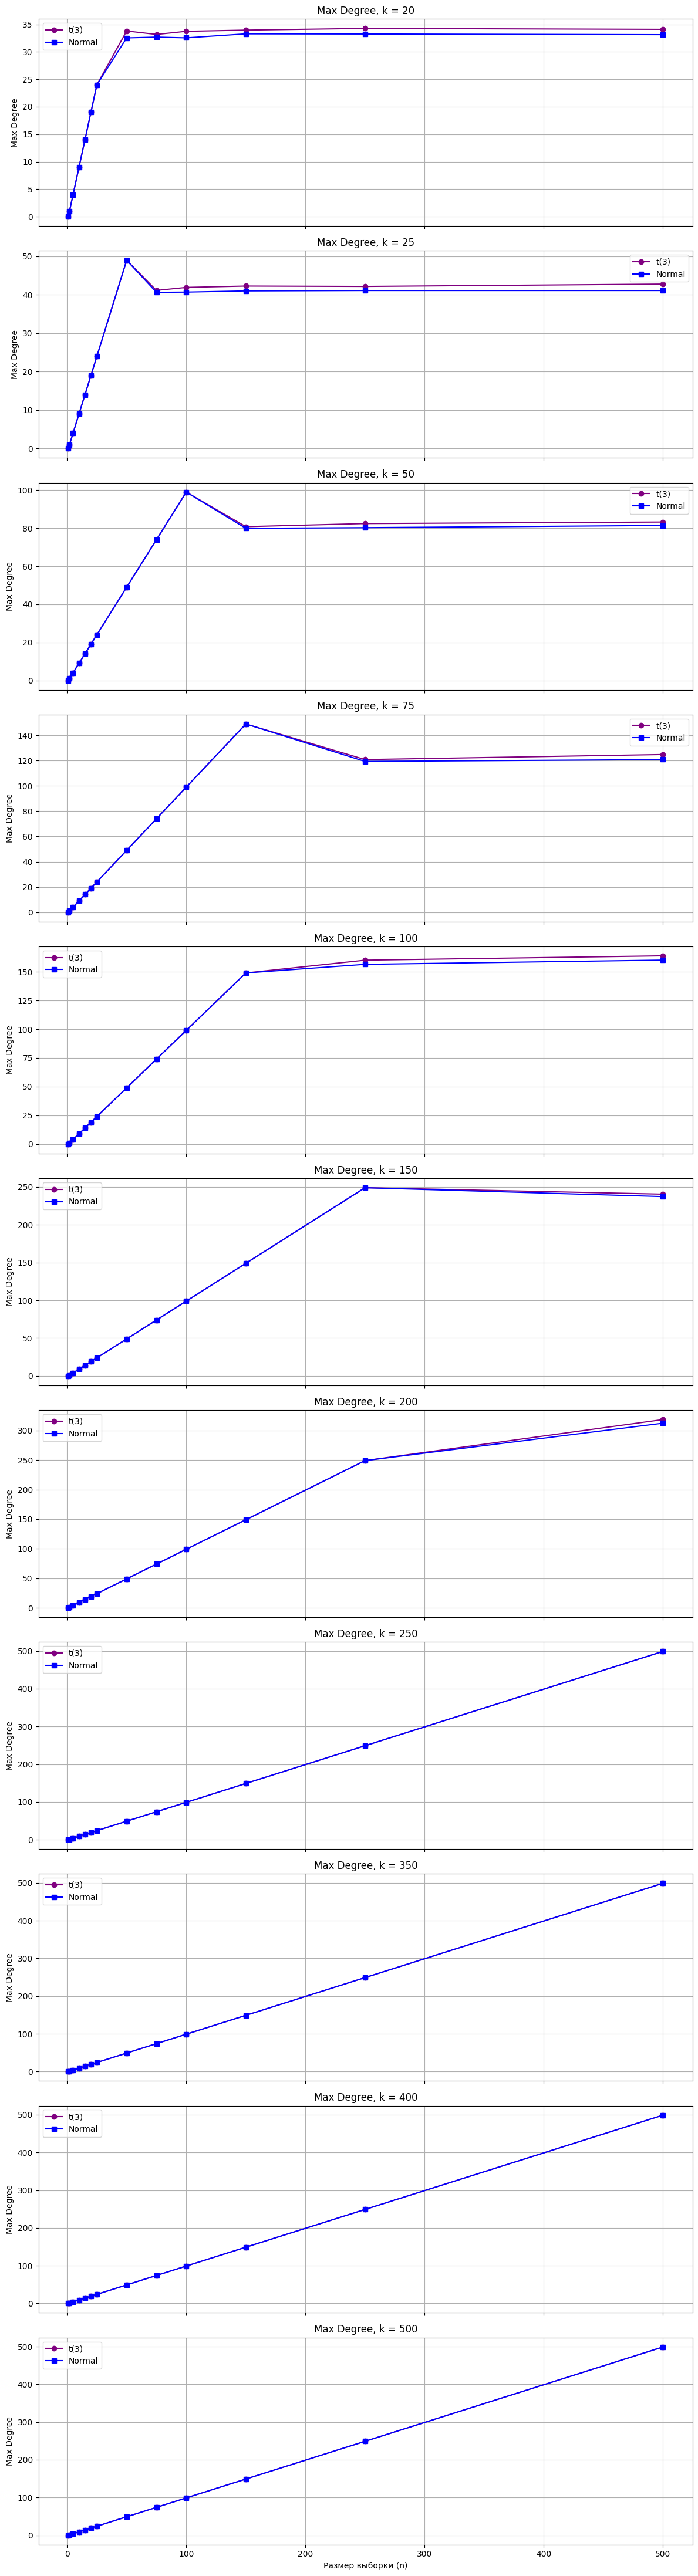

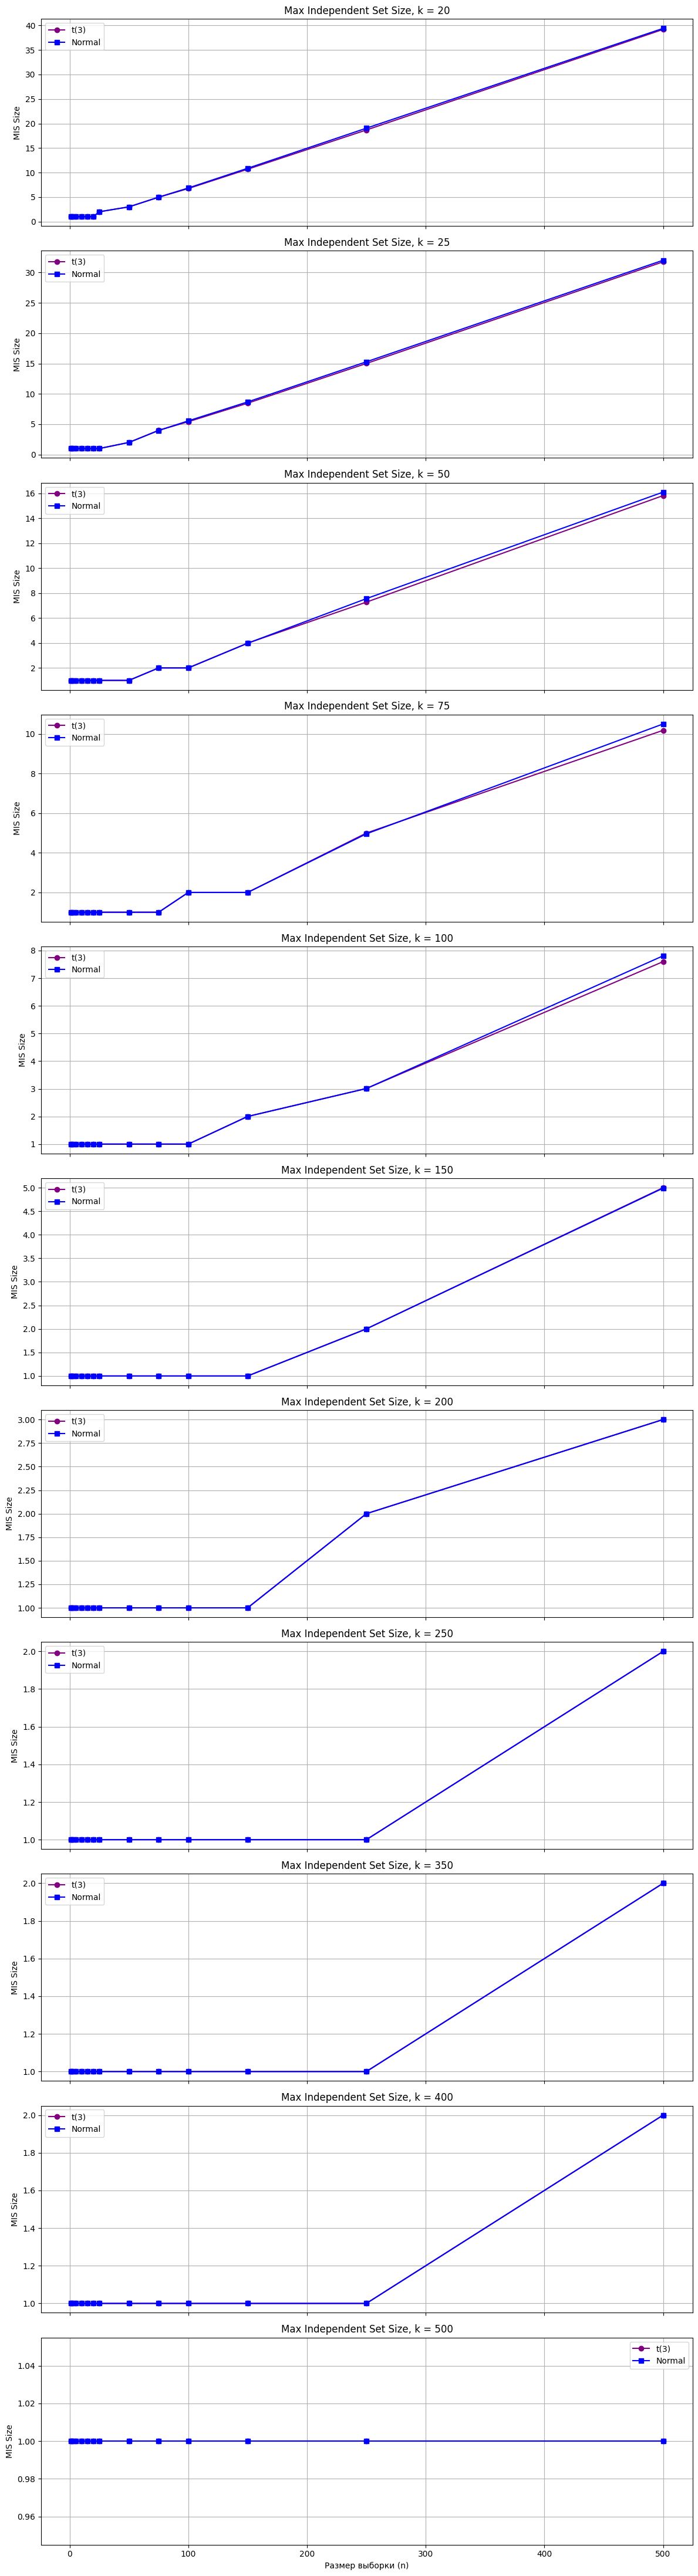

In [3]:
from scipy.stats import t, norm

n_samples_list = [1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 150, 250, 500]
k_neighbours_list = [20, 25, 50, 75, 100, 150, 200, 250, 350, 400, 500]
n_iter = 100  


fig_deg, axs_deg = plt.subplots(len(k_neighbours_list), 1, figsize=(12, 4 * len(k_neighbours_list)), sharex=True)
fig_mis, axs_mis = plt.subplots(len(k_neighbours_list), 1, figsize=(12, 4 * len(k_neighbours_list)), sharex=True)

for i, k in enumerate(tqdm(k_neighbours_list, desc="K neighbours")):
    t3_deg = []
    normal_deg = []
    t3_mis = []
    normal_mis = []

    for n in tqdm(n_samples_list, leave=False):
        degs_t3 = []
        degs_norm = []
        mis_t3 = []
        mis_norm = []

        for _ in range(n_iter):
            data_t3 = t.rvs(df=3, size=n)
            G_t3 = build_knn_graph(data_t3, k)
            degs_t3.append(max_degree(G_t3))
            mis_t3.append(max_independent_set_size(G_t3))
            data_norm = norm.rvs(loc=0, scale=1, size=n)
            G_norm = build_knn_graph(data_norm, k)
            degs_norm.append(max_degree(G_norm))
            mis_norm.append(max_independent_set_size(G_norm))

        t3_deg.append(np.mean(degs_t3))
        normal_deg.append(np.mean(degs_norm))
        t3_mis.append(np.mean(mis_t3))
        normal_mis.append(np.mean(mis_norm))

    
    axs_deg[i].plot(n_samples_list, t3_deg, label="t(3)", color="purple", marker="o")
    axs_deg[i].plot(n_samples_list, normal_deg, label="Normal", color="blue", marker="s")
    axs_deg[i].set_title(f"Max Degree, k = {k}")
    axs_deg[i].set_ylabel("Max Degree")
    axs_deg[i].legend()
    axs_deg[i].grid(True)

    
    axs_mis[i].plot(n_samples_list, t3_mis, label="t(3)", color="purple", marker="o")
    axs_mis[i].plot(n_samples_list, normal_mis, label="Normal", color="blue", marker="s")
    axs_mis[i].set_title(f"Max Independent Set Size, k = {k}")
    axs_mis[i].set_ylabel("MIS Size")
    axs_mis[i].legend()
    axs_mis[i].grid(True)


axs_deg[-1].set_xlabel("Размер выборки (n)")
axs_mis[-1].set_xlabel("Размер выборки (n)")
fig_deg.tight_layout()
fig_mis.tight_layout()
plt.show()


In [4]:
def plot_grid_mis_size_dist(distance_thresholds):
    dist_configs = [
        ("normal", 1),
        ("t3", 3)
    ]

    for dist_name, alpha in dist_configs:
        fig, axes = plt.subplots(
            nrows=len(n_samples),
            ncols=len(distance_thresholds),
            figsize=(4 * len(distance_thresholds), 3 * len(n_samples)),
            sharex=True, sharey=True
        )
        fig.suptitle(f"Max Independent Set Size in Distance Graphs — {dist_name}, alpha={alpha}", fontsize=16)

        for i, n in enumerate(tqdm(n_samples, desc=f"{dist_name} sample sizes")):
            for j, d in enumerate(distance_thresholds):
                mis_sizes = []
                for _ in range(n_iter):
                    data = generate_sample(dist_name, alpha=alpha, size=n)
                    G = build_distance_graph(data, d=d)
                    mis_sizes.append(max_independent_set_size(G))

                ax = axes[i, j]
                ax.plot(mis_sizes, color="purple", alpha=0.3, marker='.', linestyle='None', markersize=1)
                avg_mis = np.mean(mis_sizes)
                ax.set_title(f"n={n}, d={d}\navg={avg_mis:.2f}")
                ax.set_xlim(0, n_iter)
                ax.set_ylim(0, n + 2)

                
                if j == 0:
                    ax.set_ylabel(f"n={n}")
                if i == len(n_samples) - 1:
                    ax.set_xlabel(f"d={d}")

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()


normal sample sizes: 100%|████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.06s/it]


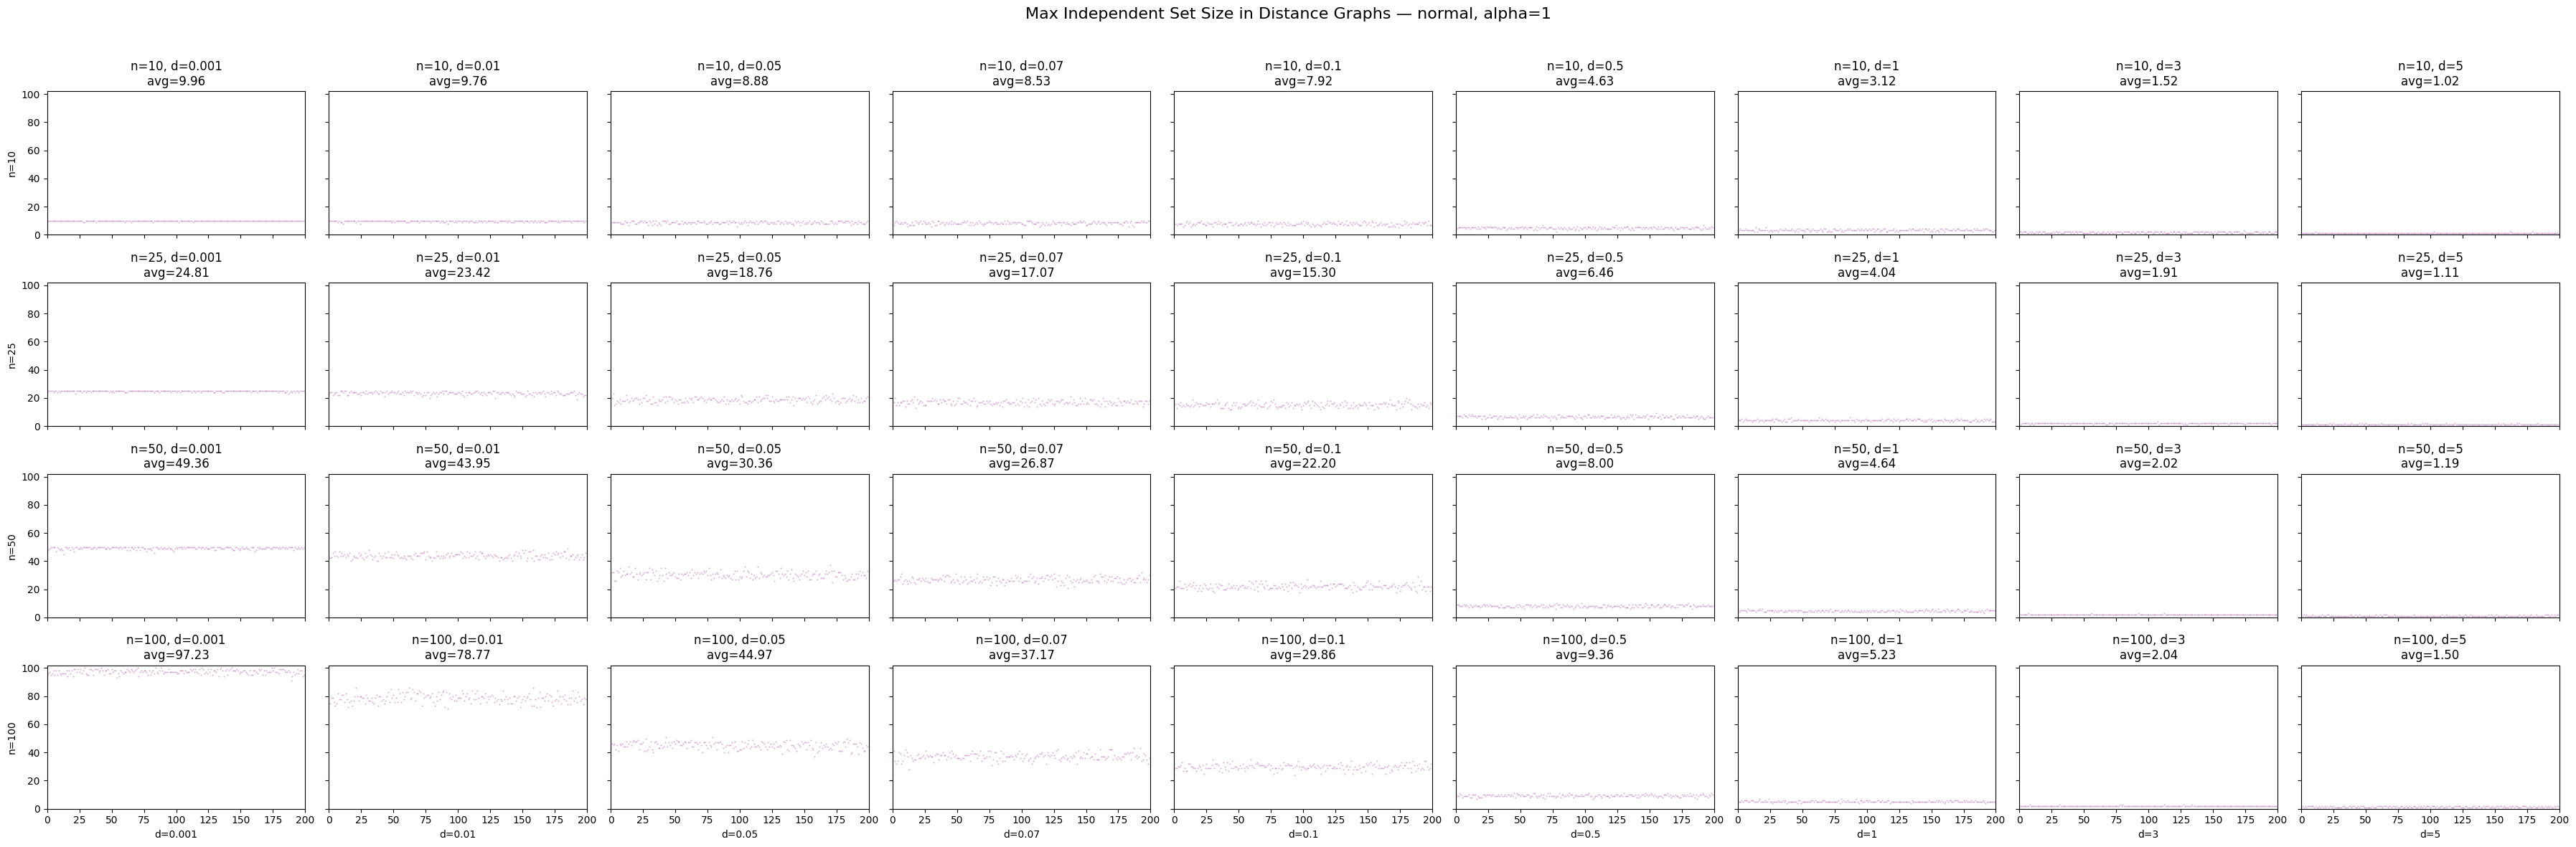

t3 sample sizes: 100%|████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.07s/it]


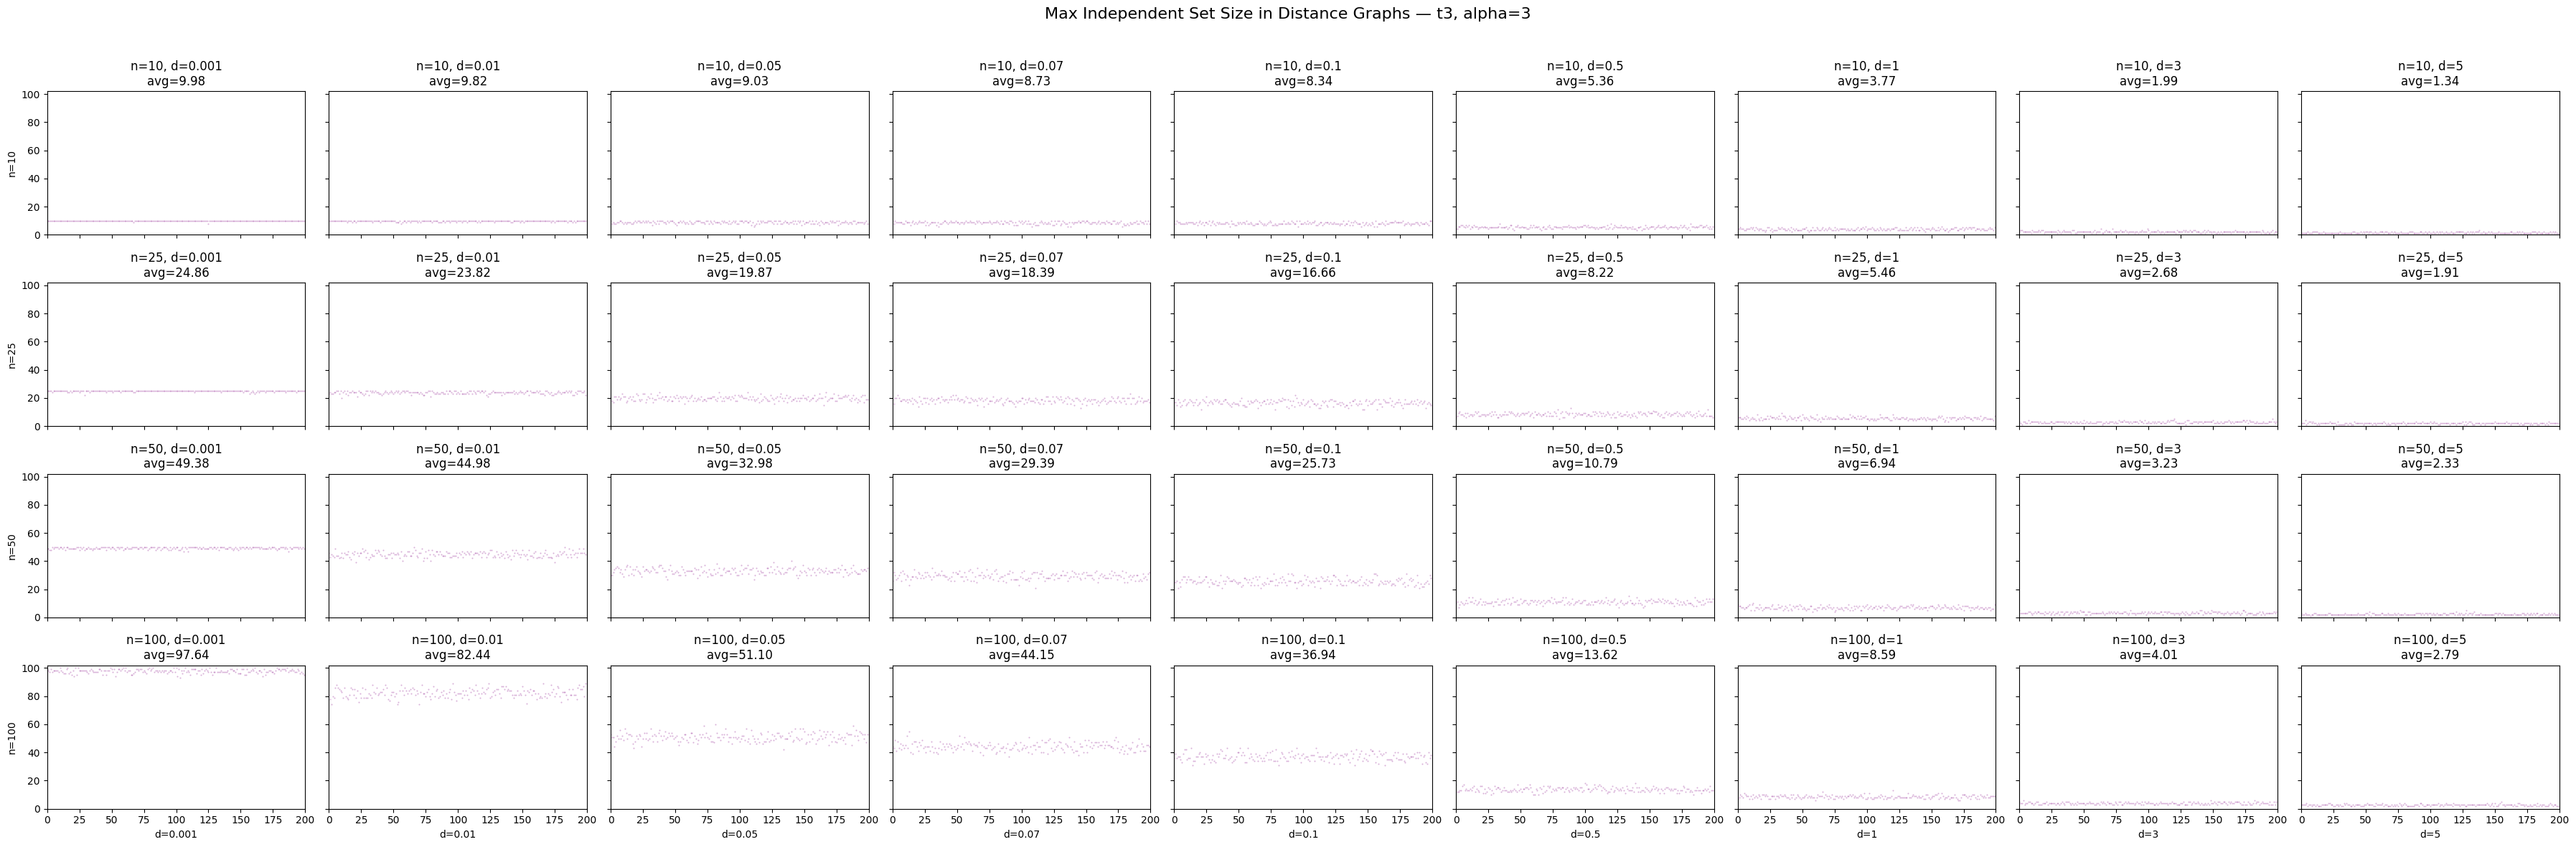

In [5]:
n_samples = [10, 25, 50, 100]
distance_thresholds = [0.001, 0.01,0.05,0.07, 0.1, 0.5, 1, 3, 5]
n_iter = 200
plot_grid_mis_size_dist(distance_thresholds)

# Исследование зависимости числовой характеристики T от параметров процедуры построения графа и размера выборки



k: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


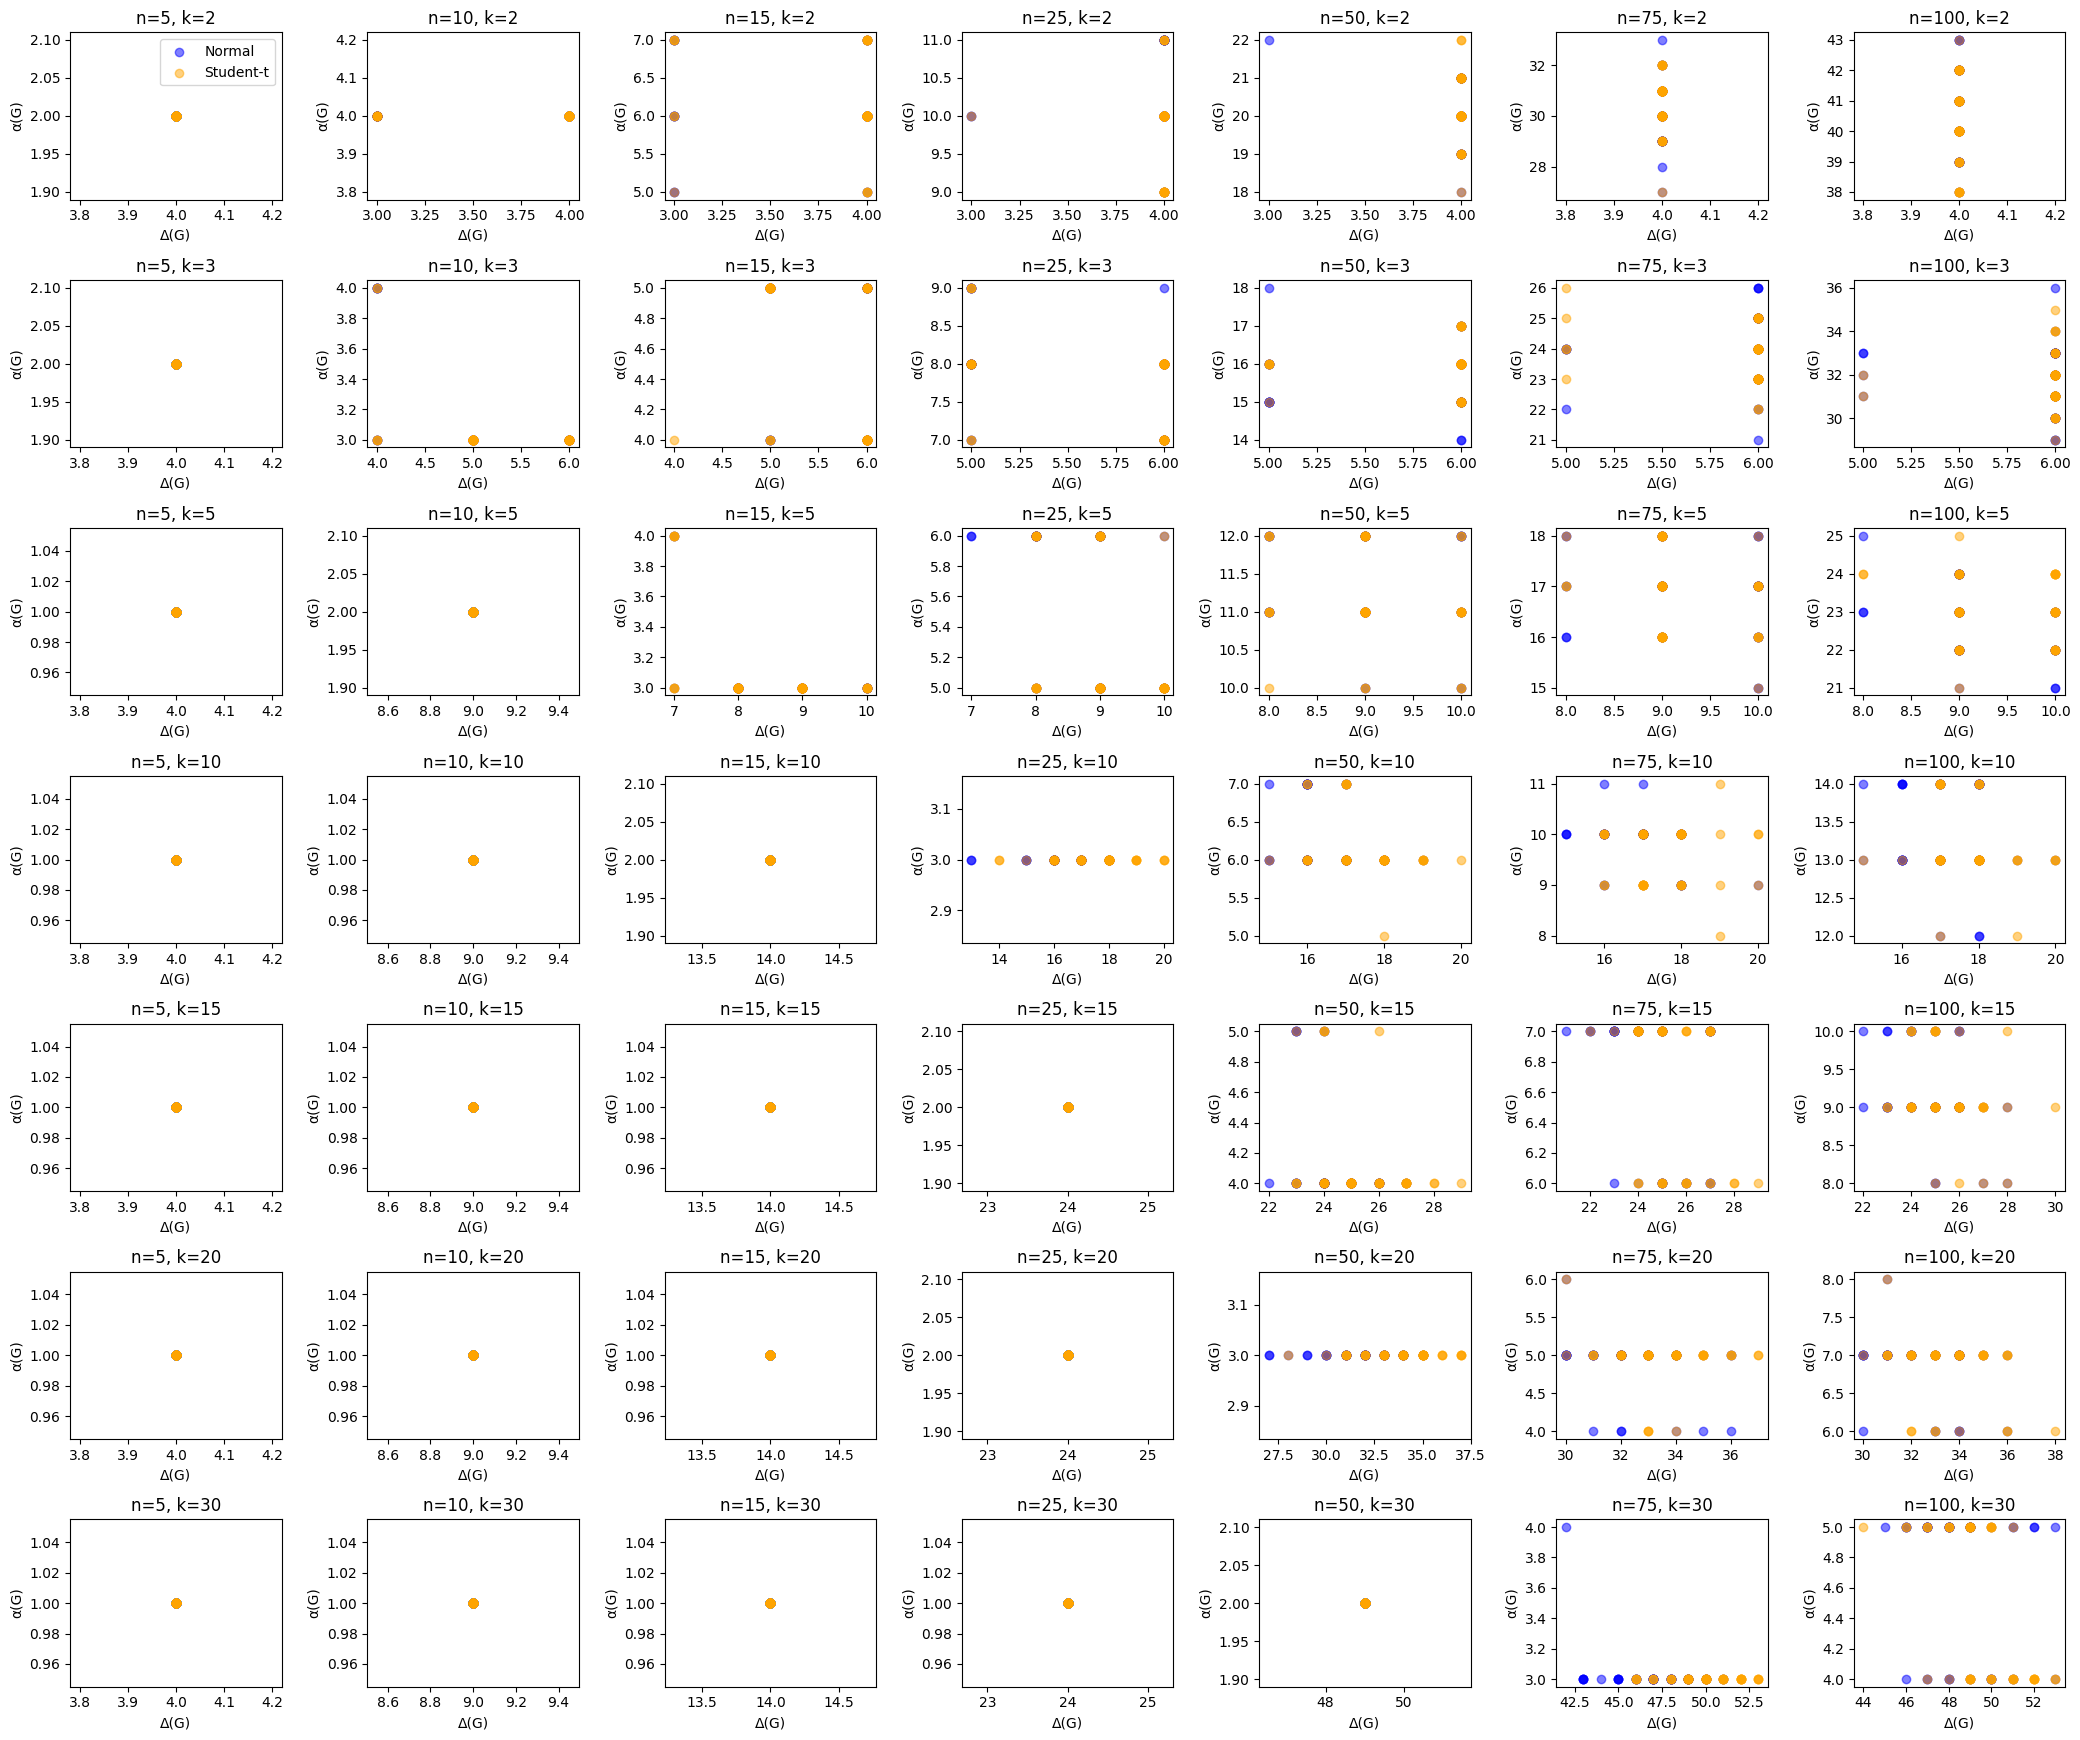

In [6]:
from src.data_generation import generate_sample
from src.graph_utils import build_knn_graph, max_degree, max_independent_set_size

n_samples = [5, 10, 15, 25, 50, 75, 100]
k_neighbours = [2, 3, 5, 10, 15, 20, 30]
n_iter = 50

fig, axis = plt.subplots(
    nrows=len(k_neighbours),
    ncols=len(n_samples),
    figsize=(3 * len(n_samples), 2.5 * len(k_neighbours))
)

for i, k in enumerate(tqdm(k_neighbours, desc="k")):
    for j, n in enumerate(tqdm(n_samples, desc="n", leave=False)):
        max_deg_normal = []
        max_deg_t3 = []
        alpha_normal = []
        alpha_t3 = []

        for seed in range(n_iter):
            # Нормальное распределение
            normal_sample = generate_sample("normal", alpha=1.0, size=n, seed=seed)
            G_normal = build_knn_graph(normal_sample, k)
            max_deg_normal.append(max_degree(G_normal))
            alpha_normal.append(max_independent_set_size(G_normal))

            # Стьюдент 3
            t3_sample = generate_sample("t3", alpha=3, size=n, seed=seed)
            G_t3 = build_knn_graph(t3_sample, k)
            max_deg_t3.append(max_degree(G_t3))
            alpha_t3.append(max_independent_set_size(G_t3))

        ax = axis[i][j] if len(k_neighbours) > 1 else axis[j]
        ax.scatter(max_deg_normal, alpha_normal, color='blue', alpha=0.5, label="Normal" if i == 0 and j == 0 else "")
        ax.scatter(max_deg_t3, alpha_t3, color='orange', alpha=0.5, label="Student-t" if i == 0 and j == 0 else "")

        ax.set_title(f"n={n}, k={k}")
        ax.set_xlabel("Δ(G)")
        ax.set_ylabel("α(G)")

        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.show()

#### здесь видим, что данные не различимы, построить разделяющую плоскость затруднительно.



d: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


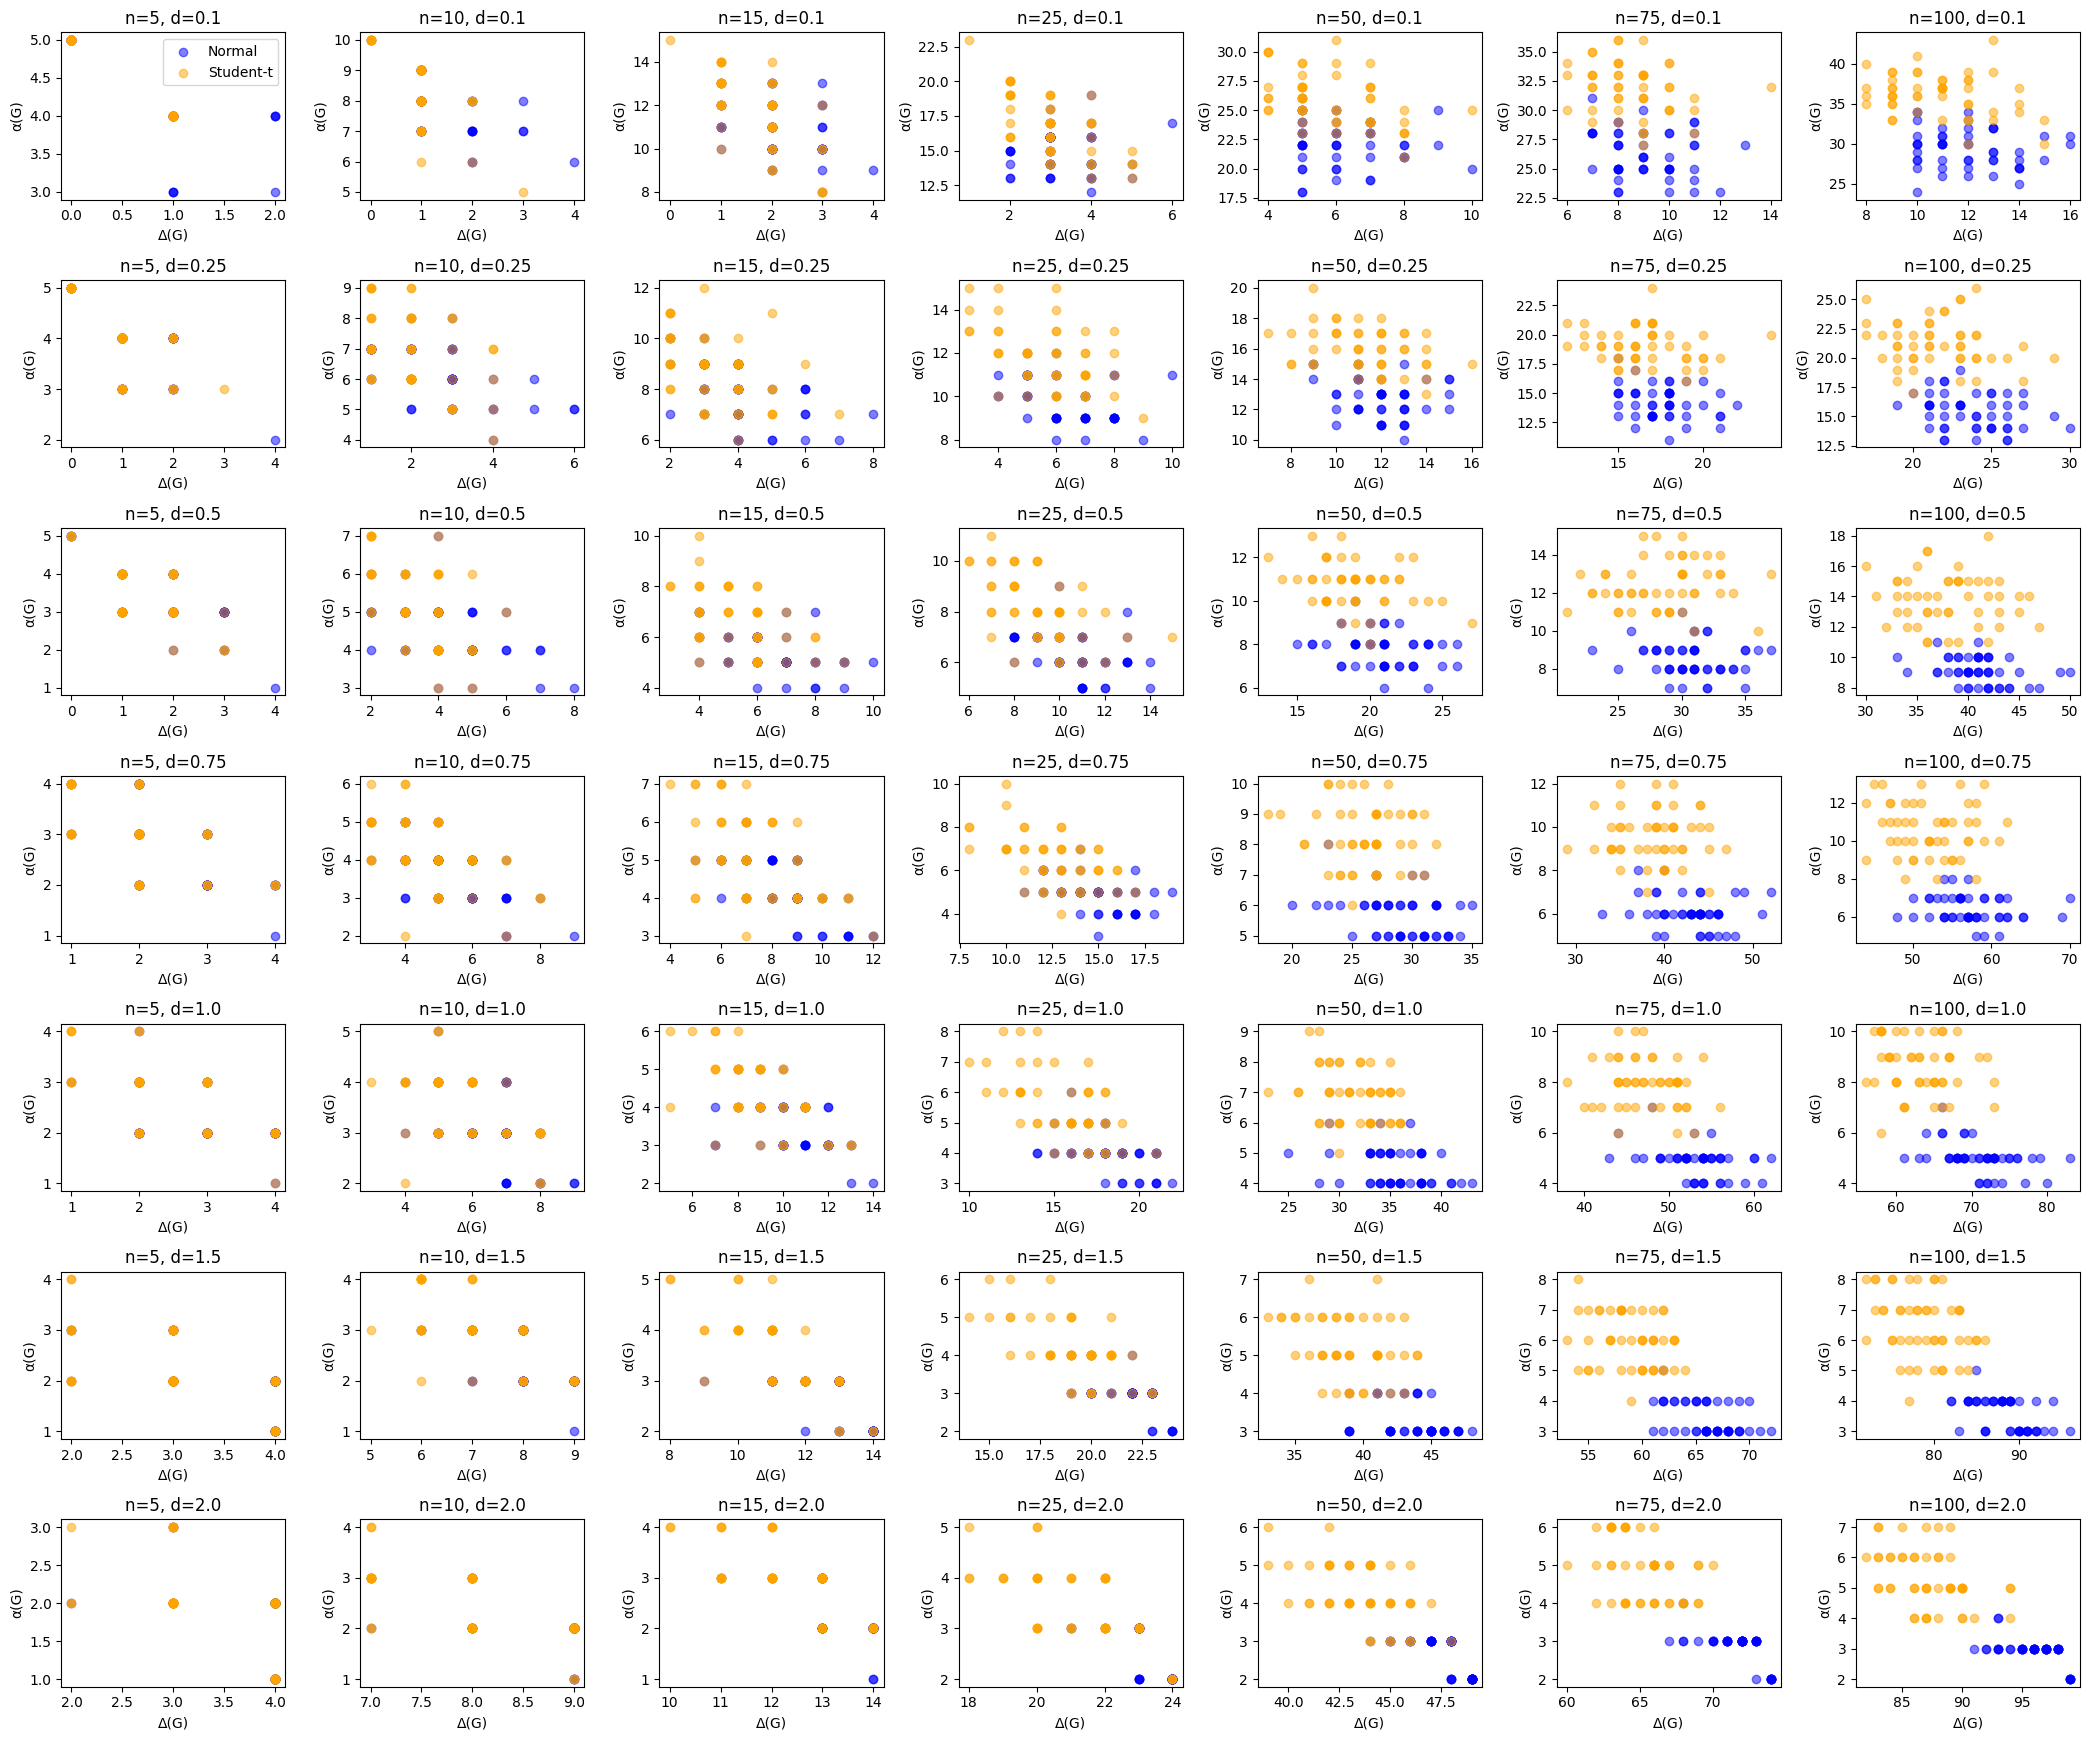

In [7]:
from src.data_generation import generate_sample
from src.graph_utils import build_distance_graph, max_degree, max_independent_set_size

# Задаем размеры выборки и расстояния для порога
n_samples = [5, 10, 15, 25, 50, 75, 100]
d_thresholds = [0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]
n_iter = 50

# Инициализируем subplot сетку
fig, axis = plt.subplots(
    nrows=len(d_thresholds),
    ncols=len(n_samples),
    figsize=(3 * len(n_samples), 2.5 * len(d_thresholds))
)

for i, d in enumerate(tqdm(d_thresholds, desc="d")):
    for j, n in enumerate(tqdm(n_samples, desc="n", leave=False)):
        max_deg_normal = []
        max_deg_t3 = []
        alpha_normal = []
        alpha_t3 = []

        for seed in range(n_iter):
            # Нормальное распределение
            normal_sample = generate_sample("normal", alpha=1.0, size=n, seed=seed)
            G_normal = build_distance_graph(normal_sample, d)
            max_deg_normal.append(max_degree(G_normal))
            alpha_normal.append(max_independent_set_size(G_normal))

            # Стьюдент 3
            t3_sample = generate_sample("t3", alpha=3, size=n, seed=seed)
            G_t3 = build_distance_graph(t3_sample, d)
            max_deg_t3.append(max_degree(G_t3))
            alpha_t3.append(max_independent_set_size(G_t3))

        # Рисуем точки
        ax = axis[i][j] if len(d_thresholds) > 1 else axis[j]
        ax.scatter(max_deg_normal, alpha_normal, color='blue', alpha=0.5, label="Normal" if i == 0 and j == 0 else "")
        ax.scatter(max_deg_t3, alpha_t3, color='orange', alpha=0.5, label="Student-t" if i == 0 and j == 0 else "")

        ax.set_title(f"n={n}, d={d}")
        ax.set_xlabel("Δ(G)")
        ax.set_ylabel("α(G)")

        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.show()

#### здесь данные уже разделимы, т.е. в случае dist разделяющая плоскость находится лучше



dist: 100%|███████████████████████████████████████████████████████████████████| 7/7 [00:46<00:00,  6.69s/it]


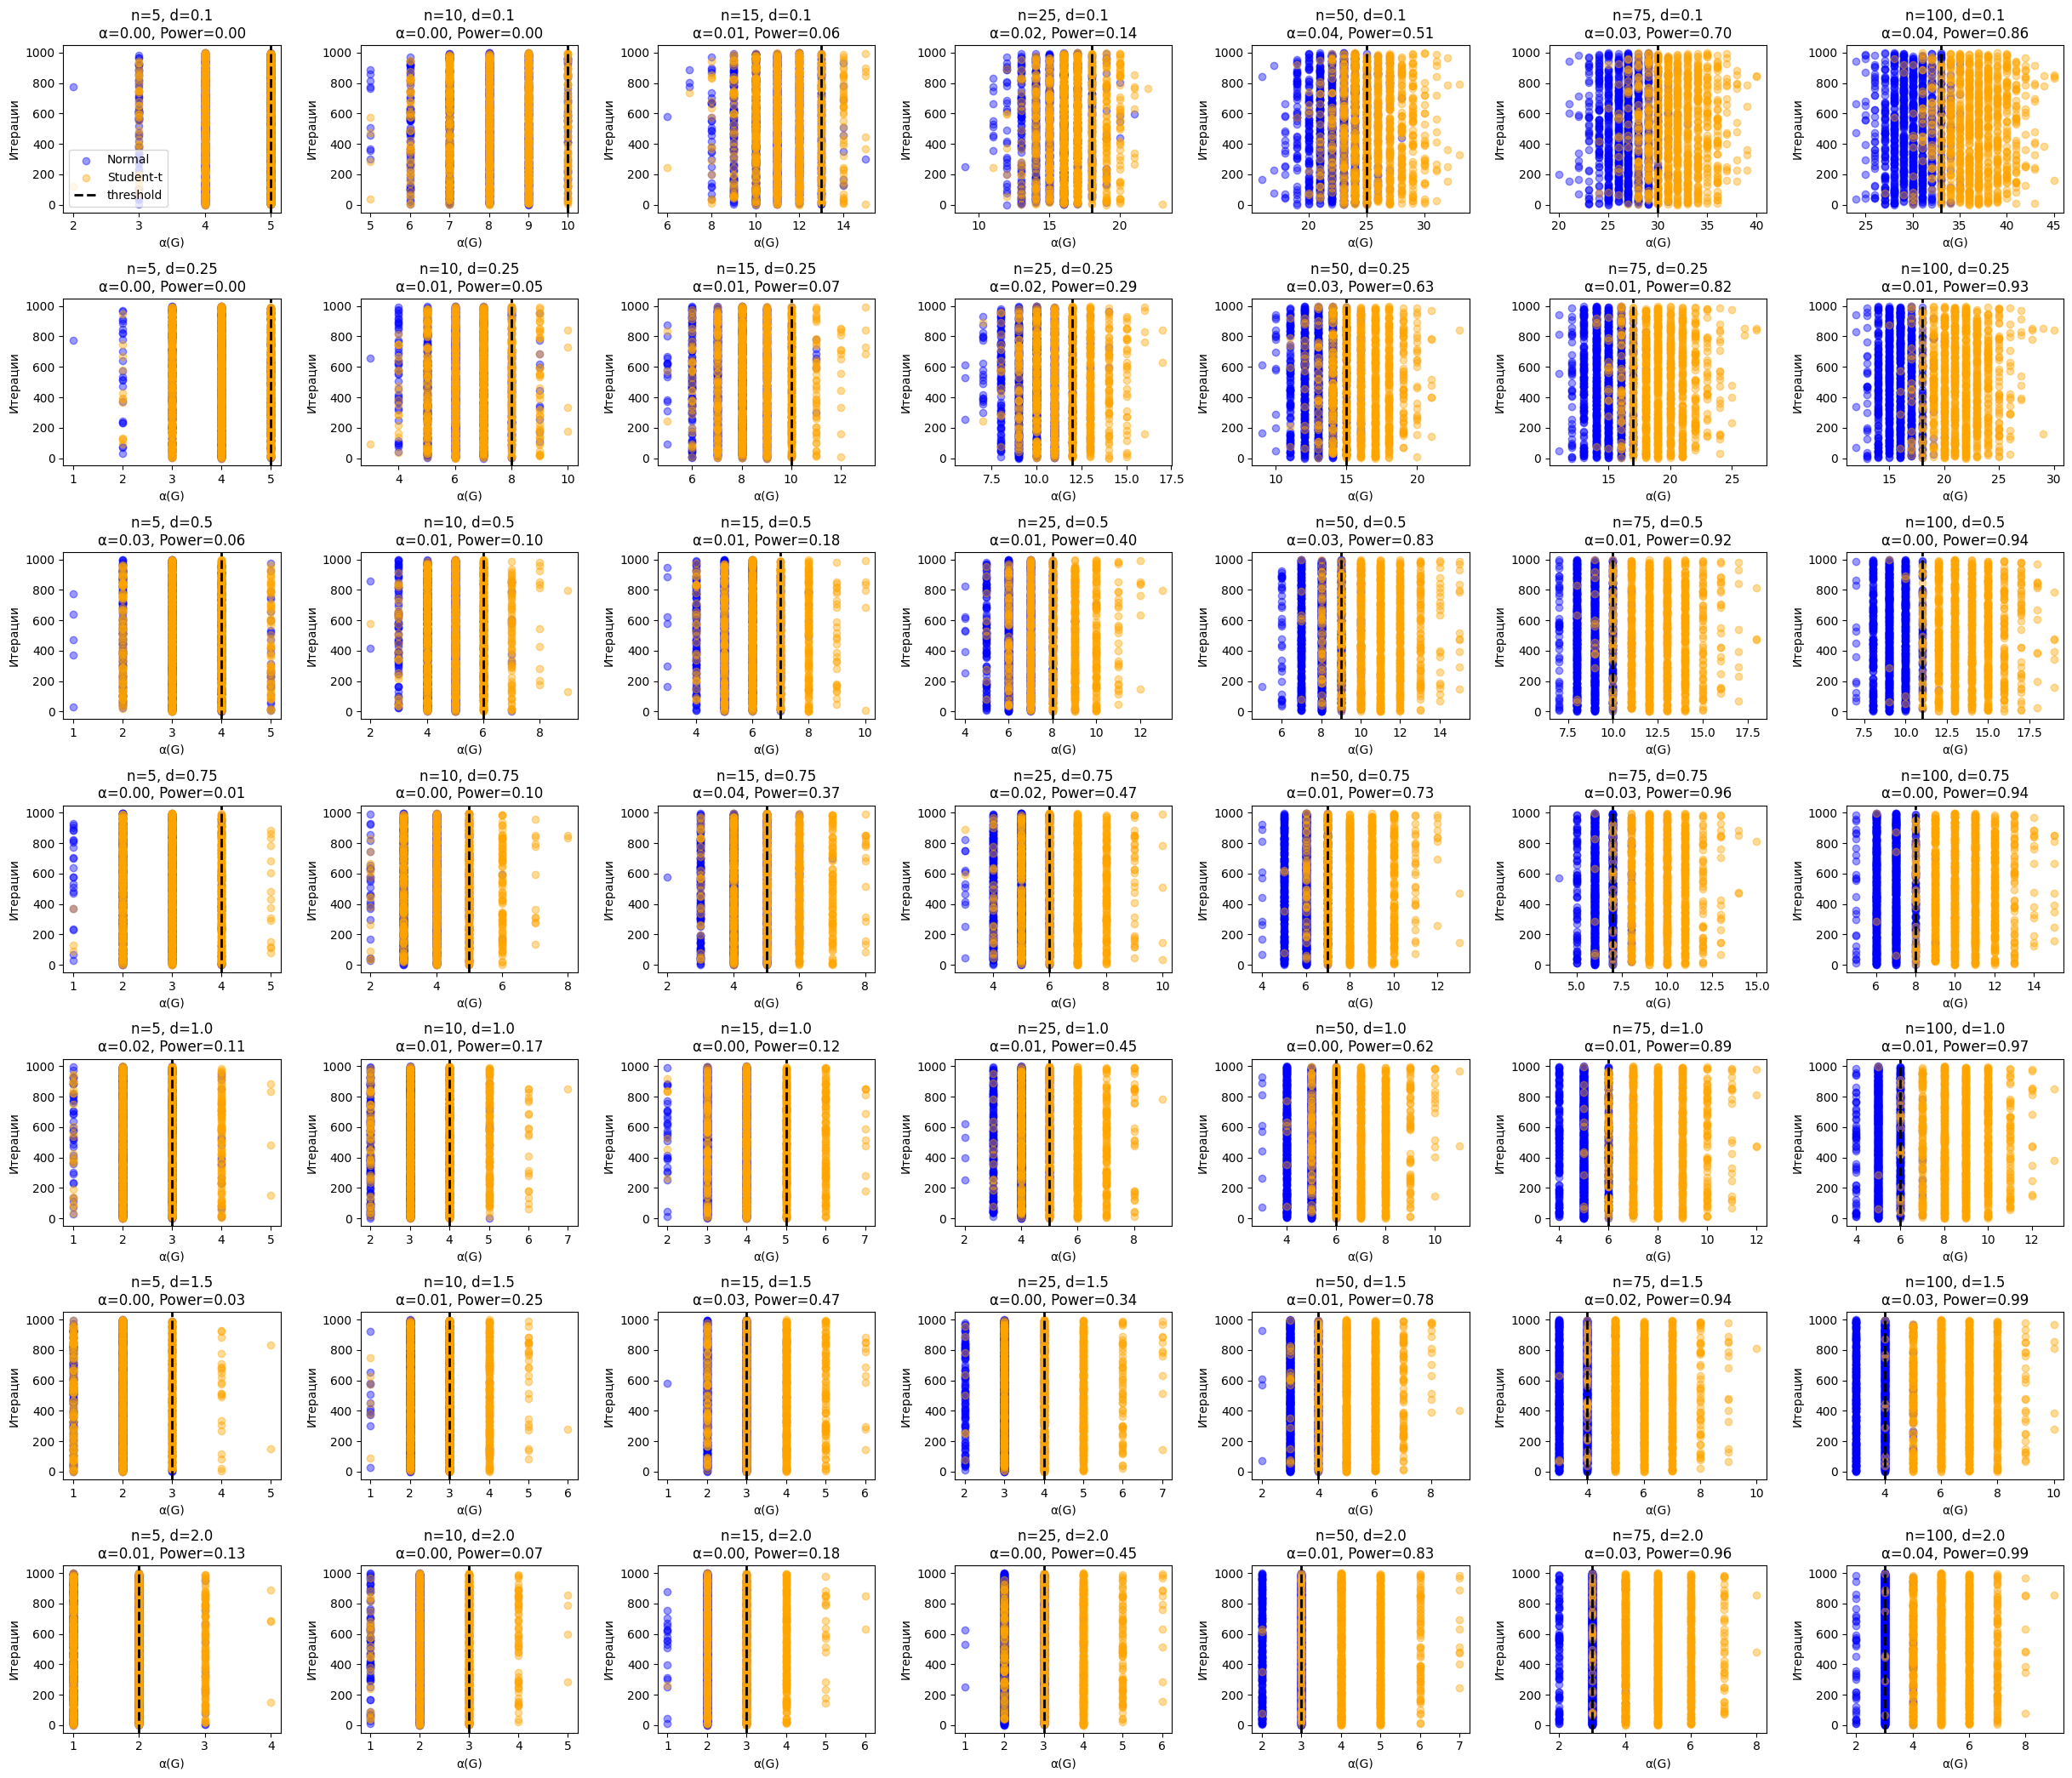

In [4]:
def student_distribution(param, size):
    return generate_sample("t3", alpha=param, size=size)

def normal_distribution(param, size):
    return generate_sample("normal", alpha=param, size=size)

# альтернатива: max_degree
def calculate_independent_set_size(data, d):
    G = build_distance_graph(data, d)
    return max_independent_set_size(G)

n_samples = [5, 10, 15, 25, 50, 75, 100]
distances = [0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]
n_iter = 1000

fig, axis = plt.subplots(
    nrows=len(distances),
    ncols=len(n_samples),
    figsize=(3.5 * len(n_samples), 3 * len(distances))
)


for i, d in enumerate(tqdm(distances, desc="dist")):
    for j, n in enumerate(tqdm(n_samples, desc="n", leave=False)):

        # Сэмплы для H0: normal
        h0 = [generate_sample("normal", alpha=1.0, size=n, seed=seed) for seed in range(n_iter)]
        # Сэмплы для H1: student t(3)
        h1 = [generate_sample("t3", alpha=3, size=n, seed=seed) for seed in range(n_iter)]

        t_h0 = [calculate_independent_set_size(sample, d) for sample in h0]
        t_h1 = [calculate_independent_set_size(sample, d) for sample in h1]

        threshold = np.quantile(t_h0, 0.95)
        type1_error = np.mean(np.array(t_h0) > threshold)
        power = np.mean(np.array(t_h1) > threshold)

        
        ax = axis[i][j]
        ax.scatter(t_h0, range(n_iter), color="blue", alpha=0.4, label="Normal" if i == 0 and j == 0 else "")
        ax.scatter(t_h1, range(n_iter), color="orange", alpha=0.4, label="Student-t" if i == 0 and j == 0 else "")
        ax.axvline(x=threshold, color='black', linestyle='--', linewidth=2, label="threshold" if i == 0 and j == 0 else "")

        ax.set_title(f"n={n}, d={d}\nα={type1_error:.2f}, Power={power:.2f}")
        ax.set_xlabel("α(G)")
        ax.set_ylabel("Итерации")

        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.show()

##### Значение alpha не превышает заданного порога, данные достаточно хорошо разделимы, при dist = 1, 2 можно построить дистанционный граф и определить распределение по характеристики.
